In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Synopsis

In this unit we will learn the basics of analyzing structured data. In the process we will cover:

* What is structured data
* How to use Pandas to read and write structured data
* Basic indexing operations of Pandas
* Basic operations (math and plotting) with Pandas
* Handling dates and times
* The 'split-apply-combine' framework for analysis

# An Introduction to Pandas

Pandas is a contraction for "panel data", which is kind of an obtuse saying. A shorthand way of thinking about it is to think of it as dealing with a connected series of data, like a company's stock price over time. Particularly, most spreadsheets fall into this category so pandas is the most natural way of working with Excel-type data using Python. 

Pandas can do a lot, so I find it easier to think of it as this for data:

![party](http://cdn.protoolreviews.com/wp-content/uploads/ptr/4433.jpg)

But first let's confront the ugly reality.

## Pandas is not very pythonic

Actually **using** Pandas and not just using it to read files can be conceptually difficult and is a bit of a mental switch compared to most of what we have learned so far. If you want to iterate over things, you can't use a `for` loop easily. Instead you'll need to use specific Pandas methods to do whatever functions you want. These little differences add up and can wear on you, which might make you want to stop using Pandas. That's a fine way to feel (you don't really *have* to use it), but there are some big benefits to using it, that for a lot of people, are worth the costs.

## Benefits of Pandas

1. Pandas handles a lot of file I/O drudgery for you. I'll show you this in a bit, but reading CSV files and accessing data in them is super simple
2. Pandas has a lot of *magic* built into, automaticallly taking care of many type conversions after reading a file
3. Using Pandas **is** like working with [SQL](https://en.wikipedia.org/wiki/SQL) (don't know what SQL is? Don't worry, it's a bit advanced for this course but is surely something you'll encounter if you continue to program so it's worth reading up on). So learning Pandas means that you'll have a good idea of the underpinnings how SQL databases work which might help you later in your programming education (although the syntax is different).

If you like using or want to continue using Pandas here is some recommended additional reading

The Pandas tutorial pages http://pandas.pydata.org/pandas-docs/stable/tutorials.html

10 minutes to Pandas http://pandas.pydata.org/pandas-docs/stable/10min.html

In [3]:
#We start with importing the packages
import pandas as pd #pandas is almost always imported as pd. Just because. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#We turn off the latex usage in matplotlib because LaTeX doesn't know
#how to handle a '_' character without it being escaped with a backslash
#Since we use '_' in column names typically this can be a bit of a problem
#If we don't turn this off
mpl.rc('text', usetex=False)

In [4]:
#This is an IPython "magic" to make sure that plots appear
#directly in the notebook
%matplotlib inline

## Data structures in Pandas

First, let's show some of this automagic. Remember the `CSV` files that had the college major information? Remember how much work it was? I'll remind you, it looked like this:

<img src='../Data/www/images/csv_reading.png'></img>

Let's load one of those files right now.

In [5]:
pd.read_csv('../Data/Day4-Dictionaries/College-Majors/recent_Arts.csv')

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,12818,15740,3718,0.105772,32000,22000,42000,7368,20721,5862
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,24943,21425,3918,0.075960,31000,22300,42000,13752,28786,9286
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,23656,31877,5486,0.084186,30500,21000,41000,20792,32725,11880
5,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,...,6253,6322,1465,0.102197,30000,22000,40000,3849,7635,2840
6,160,6007,STUDIO ARTS,Arts,16977,182,4364,6146,0.584776,13908,...,5673,7413,1368,0.089552,29000,19200,38300,3948,8707,3586
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068


When Pandas reads in a `CSV` it turns it into its own data structure called a `Dataframe`. This `Dataframe` is actually a Python class, you can think of it as just a type of *object*. Our data is inside this *object* and it controls how we can interact with it (so you can see the first difference between this and regular programming).


(The nice formatting that makes it look like an Excel spreadsheet is provided by IPython Notebook!)

Now, let's actually load this `CSV` into a variable so we can explore it.

In [6]:
df = pd.read_csv('../Data/Day4-Dictionaries/College-Majors/recent_Arts.csv')

## The basics of a dataframe

As usual, the choice of variable names is whatever you so choose. However, since the object we're working with is a `Dataframe` you'll very frequently see people assign this to a variable called df. 

A `Dataframe` has two basic ways to access values inside of it.

The **columns** run across the **top**

The **indices** run down the **left** (for now, you can think of these as rows)

We can get see the variables by calling them by name from the `dataframe`

In [7]:
#The columns are the labels across the top
print( df.columns ) 
print()

#The indexes run down the side
print( df.index )

Index(['Rank', 'Major_code', 'Major', 'Major_category', 'Total', 'Sample_size',
       'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')

RangeIndex(start=0, stop=8, step=1)


## Accessing Data in Pandas

Pandas supports two methodologies to access data that is stored in a column. The first is  just by typing the name of the column after the variable name

In [8]:
#We can access a column with the . notation shown here
df.Major_code

0    6099
1    6004
2    6005
3    6002
4    6000
5    6003
6    6007
7    6001
Name: Major_code, dtype: int64

The other way is similar to accessing the values of a key in a dictionary

In [9]:
#Or we can access a column of data like we access the value of a key in a dictionary
df['Major_code']

0    6099
1    6004
2    6005
3    6002
4    6000
5    6003
6    6007
7    6001
Name: Major_code, dtype: int64

With the indices, we can slice just like it was a list and get rows.

In [10]:
#We can slice like in a list, and we'll get those columns 
#Notice how the row indexes are numeric and that's what we slice on
df[0:2]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839


Notice how we have these ways of accessing:

* Accessing like a dictionary is a column
* Accessing like a list is the index (row)

and accessing a column name after a dot is something that we can do because the data is wrapped in the `Dataframe` class but in practice is just a shorthand way of accessing the column as if it were a dictionary.

However, these direct methods of accessing can be a bit limiting. For this reason Pandas has three additional methods that allow us to *slice* a dataframe and return specific rows.

## Slicing in Pandas

Pandas has 2 methods besides to direct access to slice/index data

* .iloc is integer based and works on the index
* .loc is strictly label based

To distinguish these concepts I'm going to sort the matrix so that the index labels are **not** in the same order as their position.

In [11]:
#We can sort by a single column
sdf = df.sort_values('Total')
sdf

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
5,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,...,6253,6322,1465,0.102197,30000,22000,40000,3849,7635,2840
6,160,6007,STUDIO ARTS,Arts,16977,182,4364,6146,0.584776,13908,...,5673,7413,1368,0.089552,29000,19200,38300,3948,8707,3586
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,12818,15740,3718,0.105772,32000,22000,42000,7368,20721,5862
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,24943,21425,3918,0.075960,31000,22300,42000,13752,28786,9286
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,23656,31877,5486,0.084186,30500,21000,41000,20792,32725,11880
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839


When we use the iloc method on sdf we get the first row in the new sorted `dataframe`
Check it out in comparison to above:

In [12]:
sdf.iloc[0]

Rank                                         33
Major_code                                 6099
Major                   MISCELLANEOUS FINE ARTS
Major_category                             Arts
Total                                      3340
Sample_size                                  30
Men                                        1970
Women                                      1370
ShareWomen                              0.41018
Employed                                   2914
Full_time                                  2049
Part_time                                  1067
Full_time_year_round                       1200
Unemployed                                  286
Unemployment_rate                      0.089375
Median                                    50000
P25th                                     25000
P75th                                     66000
College_jobs                                693
Non_college_jobs                           1714
Low_wage_jobs                           

This works the same as if we were indexing the `dataframe`, but the difference is that when we index, we can't access just a single row. It requires that we give a range.

In [13]:
sdf[0:1]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.41018,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755


The iloc method can handle a slice and it will return the same number of rows, in the same positions just like when we slice.

In [14]:
sdf.iloc[0:3]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
5,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,...,6253,6322,1465,0.102197,30000,22000,40000,3849,7635,2840
6,160,6007,STUDIO ARTS,Arts,16977,182,4364,6146,0.584776,13908,...,5673,7413,1368,0.089552,29000,19200,38300,3948,8707,3586


Now the **big** difference between direct slicing on the dataframe and using the iloc method is that we can actually slice **both columns and rows**.

When we access both columns and rows the syntax is:

`dataframe.iloc[row_slice, column_slice]`

In [15]:
sdf.iloc[0:3, 0:3]

,Rank,Major_code,Major
0,33,6099,MISCELLANEOUS FINE ARTS
5,154,6003,VISUAL AND PERFORMING ARTS
6,160,6007,STUDIO ARTS


If we want **all** of the rows but only some of the columns we can do that too. We just need to give it an empty slice in the row column.

In [16]:
sdf.iloc[:, 0:2]

,Rank,Major_code
0,33,6099
5,154,6003
6,160,6007
2,142,6005
7,167,6001
3,147,6002
4,150,6000
1,96,6004


And that is the `iloc` method, it allows us to slice a dataframe using integer-based labels given the order of the dataframe.

So now let's move on and see the differences that occur when we access rows by their index label using the `loc` function.

In [17]:
sdf.loc[6]

Rank                            160
Major_code                     6007
Major                   STUDIO ARTS
Major_category                 Arts
Total                         16977
Sample_size                     182
Men                            4364
Women                          6146
ShareWomen                 0.584776
Employed                      13908
Full_time                     10451
Part_time                      5673
Full_time_year_round           7413
Unemployed                     1368
Unemployment_rate         0.0895522
Median                        29000
P25th                         19200
P75th                         38300
College_jobs                   3948
Non_college_jobs               8707
Low_wage_jobs                  3586
Name: 6, dtype: object

When we use the loc method, it looks for the row labeled '6'. Notice how this was the third line in the `dataframe` (as printed above in order). So the `loc` method retrieves rows based on thier index label, which does not need to be their position in the `dataframe`!

This allows us to also access columns using just their names which is really convenient.

In [18]:
#We can also use the loc method with an index label and column labels
#Note how we can slice on columns also! But we can only slice across labels
sdf.loc[2, 'Major_code':'Major_category']

Major_code                                    6005
Major             FILM VIDEO AND PHOTOGRAPHIC ARTS
Major_category                                Arts
Name: 2, dtype: object

We can access all the rows, but only some of the columns similarly as with `loc`, just give a `:` for the rows and then the columns

In [19]:
sdf.loc[:, 'Major_code':'Major_category']

,Major_code,Major,Major_category
0,6099,MISCELLANEOUS FINE ARTS,Arts
5,6003,VISUAL AND PERFORMING ARTS,Arts
6,6007,STUDIO ARTS,Arts
2,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts
7,6001,DRAMA AND THEATER ARTS,Arts
3,6002,MUSIC,Arts
4,6000,FINE ARTS,Arts
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts


# Series: Pandas' other data type (that you'll use)

You may have noticed that when we selected only one row or column, it printed differently than when we print the `dataframe`. That's because a dataframe is for 2-dimensional data (meaning that it has multiple rows and columns). When we have 1-dimensional data that is a Pandas `series`.

The same methods work on a `series` as a `dataframe`, the only difference is that it only has one column which will be without a label. I'll demonstrate by creating and indexing a `series` right now

In [20]:
tseries = sdf.loc[0]
tseries

Rank                                         33
Major_code                                 6099
Major                   MISCELLANEOUS FINE ARTS
Major_category                             Arts
Total                                      3340
Sample_size                                  30
Men                                        1970
Women                                      1370
ShareWomen                              0.41018
Employed                                   2914
Full_time                                  2049
Part_time                                  1067
Full_time_year_round                       1200
Unemployed                                  286
Unemployment_rate                      0.089375
Median                                    50000
P25th                                     25000
P75th                                     66000
College_jobs                                693
Non_college_jobs                           1714
Low_wage_jobs                           

In [21]:
#A series is indexed just like a list
tseries[0:2]

Rank            33
Major_code    6099
Name: 0, dtype: object

In [22]:
#But it can also be indexed by its row labels
tseries['Major_code':'Major_category']

Major_code                           6099
Major             MISCELLANEOUS FINE ARTS
Major_category                       Arts
Name: 0, dtype: object

In [23]:
#We can use the iloc method, but now it returns a single value
tseries.iloc[0]

33

In [24]:
#Or the loc method, which also returns a single value
tseries.loc['Major_category']

'Arts'

## Now let's go over the benefits of using Pandas
Okay, some of that might seem tedious, but it's really important that you get a grasp of the fundamental ways of working with and manipulating `dataframe` and `series` objects. A lack of understanding of your datatypes is a sure fire way to make mistakes, and if that happens the benefits of Pandas can disappear. And you'll really like some of these benefits...

The first one is a lifesaver. Pandas can read (and write) .xls/.xlsx files! Now you don't need to open a workbook in Excel and save it to a CSV everytime someone sends one to you!

When we read an Excel spreadsheet, all we have to say is what sheet we want to use in the file. You can use either the sheetname (if it has one) or just give it the index of the sheet.

In [25]:
excel_df = pd.read_excel('../Data/College-Majors/recent_Arts.xlsx', sheet=0)
excel_df

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,12818,15740,3718,0.105772,32000,22000,42000,7368,20721,5862
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,24943,21425,3918,0.075960,31000,22300,42000,13752,28786,9286
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,23656,31877,5486,0.084186,30500,21000,41000,20792,32725,11880
5,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,...,6253,6322,1465,0.102197,30000,22000,40000,3849,7635,2840
6,160,6007,STUDIO ARTS,Arts,16977,182,4364,6146,0.584776,13908,...,5673,7413,1368,0.089552,29000,19200,38300,3948,8707,3586
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068


And it's not just excel. Pandas can actually read/write a large number of different and really useful file formats that can be essential when working with collaborators who might not be quite so python inclined. This is the full list:

        read_csv
        read_excel
        read_hdf
        read_sql
        read_json
        read_msgpack (experimental)
        read_html
        read_gbq (experimental)
        read_stata
        read_clipboard
        read_pickle

But really the only two you'll probably ever use are Excel and CSV.

### Visualization

Pandas helps you quickly explore and manipulate data as you learn about your dataset basics. One quick benefit is the built-in plotting directly from the dataframe.

Let's say that we wanted to make a plot that examined the difference between the majors in terms of the raw employment numbers.

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


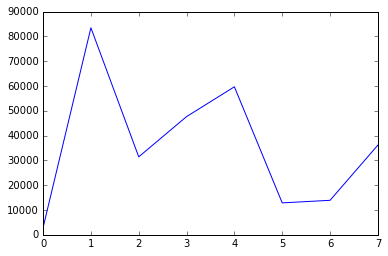

In [26]:
df['Employed'].plot()

Okay, so it's pretty ugly, but it was also super quick!

Let's actually think about this for a moment because something magical just happened and we all probably took it for granted.

### We just plotted numeric data from the file that I read in with a single command.

### When did I change the type of that data to be an integer so that we could plot it??
You might recall when we read files in the past using `open('super_cool_file.csv')`, everything was read in as a string by default, even numbers!

When we load data with Pandas it automatically converted the 'Employed' column data to integers. In fact, Pandas does this with all of the columns and when it does this it picks the **least** expansive data type that **accommodates all the data in the column**.

We can check this, so the `Unemployed` column should be integers also.

In [27]:
df['Unemployed']

0     286
1    8947
2    3718
3    3918
4    5486
5    1465
6    1368
7    3040
Name: Unemployed, dtype: int64

And that means that the `ShareWomen` column should be floats.

In [28]:
df['ShareWomen']

0    0.410180
1    0.374356
2    0.686993
3    0.444582
4    0.667034
5    0.697384
6    0.584776
7    0.629505
Name: ShareWomen, dtype: float64

Something to be aware of though, is that if we had a single string in that column of data **none of it would be converted**. All of the read values would be strings because any number can represented as a string, just as text data can.

Now, we should really change the plot type so that it displays the data as a bar.

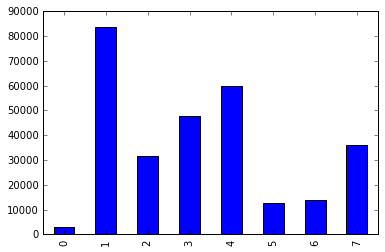

In [29]:
df['Employed'].plot(kind='bar')

Ah! That's a little bit better!

But we should never have a graph without a y-label! To change labels we'll need to operate on the `matplotlib` graph. Whenever we call a `plot()` off of a dataframe it always retuns a Matplotlib axis object that is our graph. We can modify that graph to add labels and other features.

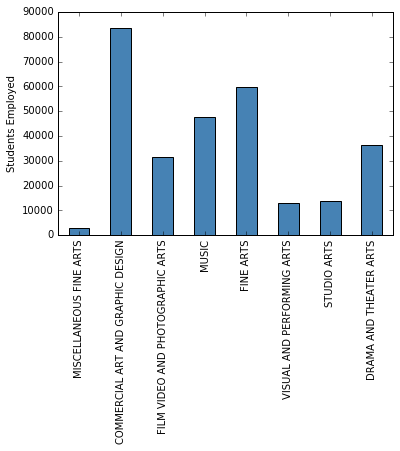

In [30]:
#I'm changing the color of the bars here because the other blue looks awful!
ax = df['Employed'].plot(kind = 'bar', color = 'steelblue')
#Now I can set the y-axis label
ax.set_ylabel('Students Employed')
#I can also set the xticks to the major names
major_labels = df['Major']
#Here I set the xtick labels. The `;` suppresses matplotlib print statements
ax.set_xticklabels(major_labels);

When we have the matplotlib axis object, we can do anything with it that would normally with a `matplotlib` graph.

## But wait, there's more!

Pandas has mathematical functions built directly into the `dataframe`. So if we want to know the average of a column or the number of rows with entries (not every position has to have a value!) we can do that quickly and easily.

Let's start by just counting the number of values in each column (it should be 8 in every column since every spot in our spreadsheet was filled out).

In [31]:
df.count()

Rank                    8
Major_code              8
Major                   8
Major_category          8
Total                   8
Sample_size             8
Men                     8
Women                   8
ShareWomen              8
Employed                8
Full_time               8
Part_time               8
Full_time_year_round    8
Unemployed              8
Unemployment_rate       8
Median                  8
P25th                   8
P75th                   8
College_jobs            8
Non_college_jobs        8
Low_wage_jobs           8
dtype: int64

But I also want to show you what happens when we have a column with no values entered for it. When there is a missing value in the raw data Pandas replaces that value with a `Not a Number` or `NaN` value from numpy.

In [32]:
import numpy as np
df['Test_column'] = np.nan
df

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,1200,286,0.089375,50000,25000,66000,693,1714,755,NaN
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,52243,8947,0.096798,35000,25000,45000,37389,38119,14839,NaN
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,15740,3718,0.105772,32000,22000,42000,7368,20721,5862,NaN
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,21425,3918,0.075960,31000,22300,42000,13752,28786,9286,NaN
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,31877,5486,0.084186,30500,21000,41000,20792,32725,11880,NaN
5,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,...,6322,1465,0.102197,30000,22000,40000,3849,7635,2840,NaN
6,160,6007,STUDIO ARTS,Arts,16977,182,4364,6146,0.584776,13908,...,7413,1368,0.089552,29000,19200,38300,3948,8707,3586,NaN
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,16891,3040,0.077541,27000,19200,35000,6994,25313,11068,NaN


Now when we count, it won't be the same as before.

In [33]:
df.count()

Rank                    8
Major_code              8
Major                   8
Major_category          8
Total                   8
Sample_size             8
Men                     8
Women                   8
ShareWomen              8
Employed                8
Full_time               8
Part_time               8
Full_time_year_round    8
Unemployed              8
Unemployment_rate       8
Median                  8
P25th                   8
P75th                   8
College_jobs            8
Non_college_jobs        8
Low_wage_jobs           8
Test_column             0
dtype: int64

We can also just count a few columns or single column by chaining the `count()` function after we index the Dataframe.

In [34]:
df['Employed'].count()

8

In [35]:
df.loc[0:2].count()

Rank                    3
Major_code              3
Major                   3
Major_category          3
Total                   3
Sample_size             3
Men                     3
Women                   3
ShareWomen              3
Employed                3
Full_time               3
Part_time               3
Full_time_year_round    3
Unemployed              3
Unemployment_rate       3
Median                  3
P25th                   3
P75th                   3
College_jobs            3
Non_college_jobs        3
Low_wage_jobs           3
Test_column             0
dtype: int64

There are other useful functions built in too. We can quickly take the mean or median of a column also.

In [36]:
df.Employed.mean()

36014.25

In [37]:
df.Employed.median()

33799.0

Or we can even get the mean, medians, and a host of other summary statistics for all columns!

In [38]:
df.describe()

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.0
mean,131.125000,6015.125000,44641.250000,407.500000,10847.625000,17558.62500,0.561851,36014.25000,25971.625000,14348.875000,19138.875000,3528.500000,0.090173,33062.500000,21962.500000,43662.500000,11848.125000,20465.000000,7514.500000,NaN
std,45.091772,33.964004,33635.404025,364.553347,9008.699049,19965.85873,0.132075,26965.46051,21195.795162,9425.605179,16490.457184,2753.122902,0.010891,7223.164621,2228.348203,9491.189524,12132.734793,13143.376724,4988.230777,NaN
min,33.000000,6000.000000,3340.000000,30.000000,1970.000000,1370.00000,0.374356,2914.00000,2049.000000,1067.000000,1200.000000,286.000000,0.075960,27000.000000,19200.000000,35000.000000,693.000000,1714.000000,755.000000,NaN
25%,130.500000,6001.750000,16795.250000,169.500000,3776.250000,5026.75000,0.435982,13648.50000,9950.000000,6108.000000,7140.250000,1440.750000,0.082525,29750.000000,20550.000000,39575.000000,3923.250000,8439.000000,3399.500000,NaN
50%,148.500000,6003.500000,41005.000000,344.000000,7819.500000,9038.50000,0.607140,33799.00000,23802.000000,14406.000000,16315.500000,3379.000000,0.089464,30750.000000,22000.000000,41500.000000,7181.000000,23017.000000,7574.000000,NaN
75%,155.500000,6005.500000,64084.750000,470.000000,17337.250000,21664.75000,0.672024,50666.25000,32448.500000,23838.750000,24038.000000,4310.000000,0.098148,32750.000000,22975.000000,42750.000000,15512.000000,29770.750000,11271.000000,NaN
max,167.000000,6099.000000,103480.000000,1186.000000,24786.000000,49654.00000,0.697384,83483.00000,67448.000000,24943.000000,52243.000000,8947.000000,0.105772,50000.000000,25000.000000,66000.000000,37389.000000,38119.000000,14839.000000,NaN


## We can also quickly do row/column operations in Pandas

What we're typically interested in is the percentage of Employed people out of the Total number of people for a given major. We can do that easily with Pandas.

In [39]:
#We can divide an entire column by another column
df['Employed']/df['Total']

0    0.872455
1    0.806755
2    0.810944
3    0.786074
4    0.801706
5    0.792000
6    0.819226
7    0.836204
dtype: float64

What it does is divide each value in the `Employed` column by the value in the `Total` column that is in the same row. It does that for all of the rows simultaneously with just one line of code!

If we want to save this column of data (which we will) we can just make up a new name and assign the output to our `dataframe`.

In [40]:
#And now use this to add a new column to the dataframe
df['Percent_Employed'] = df['Employed']/df['Total']

And we can check that it worked below. I'm going to use the `head()` function to print the `dataframe`. `head()` will only print the number of rows given as the argument. It helps save space.

In [41]:
df.head(2)

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column,Percent_Employed
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,286,0.089375,50000,25000,66000,693,1714,755,NaN,0.872455
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,8947,0.096798,35000,25000,45000,37389,38119,14839,NaN,0.806755


We can perform complicated functions to calculate new columns too.

In [42]:
#I'm only doing this for show (this calculation doesn't make any sense)
(df['College_jobs'] - df['Non_college_jobs']) ** 2 / 700

0      1489.201429
1       761.285714
2    254718.012857
3    322887.365714
4    203423.555714
5     20476.851429
6     32354.401429
7    479408.230000
dtype: float64

We can do the same with rows, but it's very unlikely that we will have a situation like this that makes sense

In [43]:
#We can perform row level operations, making a new row
#Notice how each column is represented?
df.loc[0, 'Employed']/df.loc[1, 'Employed']

0.034905310063126624

## Querying - or the database mentality

So far we've just directly accessed rows and columns in the `dataframe`, but there's actually another way to get data. We can do this by *querying* the data. We can make comparions with greater than, less than, or equal signs to get only the rows or columns of the dataframe that meet our criteria.

So now let's only consider majors that have more than 20,000 students that graduated.

In [44]:
df[df.Total > 20000]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column,Percent_Employed
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,8947,0.096798,35000,25000,45000,37389,38119,14839,NaN,0.806755
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,3718,0.105772,32000,22000,42000,7368,20721,5862,NaN,0.810944
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,3918,0.075960,31000,22300,42000,13752,28786,9286,NaN,0.786074
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,5486,0.084186,30500,21000,41000,20792,32725,11880,NaN,0.801706
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,3040,0.077541,27000,19200,35000,6994,25313,11068,NaN,0.836204


We can see now that only the 5 rows that had more than 20,000 students were selected.

But how does this really work?

The greater than symbol doesn't need to be used just inside the `[]` and it isn't **actually** instructing the dataframe what to do directly. When we use an expression with the dataframe we are actually creating a **mask**

In [46]:
df.Total > 20000

0    False
1     True
2     True
3     True
4     True
5    False
6    False
7     True
Name: Total, dtype: bool

So what's going on is that on the column of interest it evaluates if the statement is `True` or `False` and then pipes that truth array into the dataframe. Then any rows that were `True` are kept.

In [47]:
df[df.Total > 20000]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column,Percent_Employed
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,8947,0.096798,35000,25000,45000,37389,38119,14839,NaN,0.806755
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,3718,0.105772,32000,22000,42000,7368,20721,5862,NaN,0.810944
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,3918,0.075960,31000,22300,42000,13752,28786,9286,NaN,0.786074
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,5486,0.084186,30500,21000,41000,20792,32725,11880,NaN,0.801706
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,3040,0.077541,27000,19200,35000,6994,25313,11068,NaN,0.836204


Neat, huh?

In [48]:
df

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column,Percent_Employed
0,33,6099,MISCELLANEOUS FINE ARTS,Arts,3340,30,1970,1370,0.410180,2914,...,286,0.089375,50000,25000,66000,693,1714,755,NaN,0.872455
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,8947,0.096798,35000,25000,45000,37389,38119,14839,NaN,0.806755
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,3718,0.105772,32000,22000,42000,7368,20721,5862,NaN,0.810944
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,3918,0.075960,31000,22300,42000,13752,28786,9286,NaN,0.786074
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,5486,0.084186,30500,21000,41000,20792,32725,11880,NaN,0.801706
5,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,...,1465,0.102197,30000,22000,40000,3849,7635,2840,NaN,0.792000
6,160,6007,STUDIO ARTS,Arts,16977,182,4364,6146,0.584776,13908,...,1368,0.089552,29000,19200,38300,3948,8707,3586,NaN,0.819226
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,3040,0.077541,27000,19200,35000,6994,25313,11068,NaN,0.836204


We can chain selection operators off of the query also if we want to know a bit more about the resulting column

In [49]:
df[df.Employed > 20000].Unemployment_rate.mean()

0.0880513834

We can use more than one criterion to select rows in our `dataframe`. The syntax for this is very "un-pythonic", but it's a very useful way to get just the part of the data that you are interested in. To do that we have to use this syntax:

`df[(first expression) & (second expression) | (third expression) ...]`

Each expression has to be enclosed in parentheses.

Expressions can be chained with an `and` statement, which must be represented as `&`.

Alternatively you can chain expressions with an `or` statement, which must be represented as `|`.

You can have as many statements as you want.

In [50]:
df[(df.Total > 20000) & (df.ShareWomen > 0.50)]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column,Percent_Employed
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,3718,0.105772,32000,22000,42000,7368,20721,5862,NaN,0.810944
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,5486,0.084186,30500,21000,41000,20792,32725,11880,NaN,0.801706
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,3040,0.077541,27000,19200,35000,6994,25313,11068,NaN,0.836204


And just for fun I'll demonstrate the same statement with the `|` operator

In [51]:
df[(df.Total > 20000) | (df.ShareWomen > 0.50)]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Test_column,Percent_Employed
1,96,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,103480,1186,8617,5156,0.374356,83483,...,8947,0.096798,35000,25000,45000,37389,38119,14839,NaN,0.806755
2,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,38761,331,22339,49030,0.686993,31433,...,3718,0.105772,32000,22000,42000,7368,20721,5862,NaN,0.810944
3,147,6002,MUSIC,Arts,60633,419,15670,12543,0.444582,47662,...,3918,0.075960,31000,22300,42000,13752,28786,9286,NaN,0.786074
4,150,6000,FINE ARTS,Arts,74440,623,24786,49654,0.667034,59679,...,5486,0.084186,30500,21000,41000,20792,32725,11880,NaN,0.801706
5,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,...,1465,0.102197,30000,22000,40000,3849,7635,2840,NaN,0.792000
6,160,6007,STUDIO ARTS,Arts,16977,182,4364,6146,0.584776,13908,...,1368,0.089552,29000,19200,38300,3948,8707,3586,NaN,0.819226
7,167,6001,DRAMA AND THEATER ARTS,Arts,43249,357,7022,11931,0.629505,36165,...,3040,0.077541,27000,19200,35000,6994,25313,11068,NaN,0.836204


So you can see here that we now have 7 of the 8 majors printing. Only one major (Miscellaneous fine arts) does not have either more than 20,000 students that have graduated recently or a Share of Women in the major greater than 50%.

And with that you've seen the biggest conceptual shift between working with Pandas and analyzing data with raw Python.

When you directly program code to work with data, you tell it what to do, step by step. We would go through each value and see if it met our conditions like this:

    for total_students in total:
        if total_students > 20000:
            #Continue with code
            
We're basically writing a procedure for how things should be done. It's very readable and, if we keep our statements separated, it's very easy to debug.

Pandas doesn't work like that. You don't tell it **what to do** really, you tell it **what you want** and it figures out how to get it to you. 

For someone that's been doing data analysis without Pandas or heavily relying on SQL this is an unsettling shift. That unsettling feeling isn't unwarranted, it's a tough concept to get used to and 'hiding' the mechanics of what is going on can easily lead to errors (especially when you try to execute a complicated statement right away). 

The worst part is that in a lot of these cases, Pandas will dutifully execute the statement you asked for and not provide an error (since technically there wasn't an error, just a gap in translating what you wanted/how you wanted the data handled to the machine). 

My advice though is to start slowly. IPython Notebook changes everything when it comes to learning complicated packages, making it possible to both learn a package and, whenever you start a new project, your data.

Even with these hiccups, which is more related to this style of analysis than the library, Pandas has some amazing features that make it really worth using.

# Dates - the magical transformation

We talked earlier about how Pandas automagically converts data types when reading a file in. One of the best automagic features is Pandas' ability to handle time. To show you how amazing this is, I'll also teach a bit about how we would handle time without using Pandas.

Typically we would use the `datetime` library to handle time in regular code. `datetime` is a real workhorse of a library (and you'll still need to use it), but it can be a bit unfriendly.

One unfriendly bit is that the module we use most has the exact same name as the package itself. Make sure to pay attention to code online to see if they are importing `datetime` the package or `datetime` the module!

We're going to import the package so that we can access all of the methods.

In [52]:
import datetime

datetime.date.today()

datetime.date(2016, 8, 9)

If we want just the `date` we can use the `date` module in datetime.

But typically most people care about what time it is too. To get both the date and the time, we must use the `datetime` module

In [53]:
datetime.datetime.today()

datetime.datetime(2016, 8, 9, 13, 37, 0, 748810)

So that's how dates and times are generated! The benefit is that the time is erturned in a `datetime` object so we can access individual parts of the time by name, like so:

In [54]:
date = datetime.datetime.today()
print(date.year)
print(date.month)
print(date.second)

2016
8
1


But how do we read in a list of dates? For that we actually have to convert a string using the `datetime.datetime.strptime` function. This function takes two arguments - 
    1. the date string itself
    2. a string telling it the format of the date string using a special [symbol set](https://docs.python.org/2/library/datetime.html)
    
So for every string, you have to write the format that the time is in (exactly!) in order for `datetime` to convert it.

In [55]:
datetime.datetime.strptime('2014-01-01', '%Y-%m-%d')

datetime.datetime(2014, 1, 1, 0, 0)

But do you think that all dates in all text files are formatted the same?

Absolutely not! Every file and every program typically writes out dates and times in a different format. Which would you require to write some really complex code to automatically read a file and convert those dates to a format that you can use (it's for this reason that the Python datetime web page used to be one of my most visited!).

But Pandas can take care of all of that for us!

In [7]:
aapl = pd.read_csv('../Data/Day7-Structured-Data-Analysis/aapl_stock_price.csv')
aapl.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close
0,2015-08-24,94.870003,103.449997,92.000000,103.120003,161454200.0,103.120003
1,2015-08-21,110.430000,111.900002,105.650002,105.760002,126289200.0,105.760002
2,2015-08-20,114.080002,114.349998,111.629997,112.650002,67765500.0,112.650002
3,2015-08-19,116.099998,116.519997,114.680000,115.010002,47445700.0,115.010002
4,2015-08-18,116.430000,117.440002,116.010002,116.500000,34461400.0,116.500000


In [57]:
aapl.head().Date

0    2015-08-24
1    2015-08-21
2    2015-08-20
3    2015-08-19
4    2015-08-18
Name: Date, dtype: object

It automatically read in the dates! It understands time and can use basic functions with the column

In [58]:
aapl.Date.max()

'2015-08-24'

In [59]:
aapl.Date.min()

'1980-12-12'

and can sort the dataframe based on it.

In [60]:
aapl.Date.sort_values()

8749    1980-12-12
8748    1980-12-15
8747    1980-12-16
8746    1980-12-17
8745    1980-12-18
8744    1980-12-19
8743    1980-12-22
8742    1980-12-23
8741    1980-12-24
8740    1980-12-26
8739    1980-12-29
8738    1980-12-30
8737    1980-12-31
8736    1981-01-02
8735    1981-01-05
8734    1981-01-06
8733    1981-01-07
8732    1981-01-08
8731    1981-01-09
8730    1981-01-12
8729    1981-01-13
8728    1981-01-14
8727    1981-01-15
8726    1981-01-16
8725    1981-01-19
8724    1981-01-20
8723    1981-01-21
8722    1981-01-22
8721    1981-01-23
8720    1981-01-26
           ...    
29      2015-07-14
28      2015-07-15
27      2015-07-16
26      2015-07-17
25      2015-07-20
24      2015-07-21
23      2015-07-22
22      2015-07-23
21      2015-07-24
20      2015-07-27
19      2015-07-28
18      2015-07-29
17      2015-07-30
16      2015-07-31
15      2015-08-03
14      2015-08-04
13      2015-08-05
12      2015-08-06
11      2015-08-07
10      2015-08-10
9       2015-08-11
8       2015

We can also easily select a certain period of time using queries! To specify a date, we don't even have to create a datetime object - we can just use a string representation of the time and Pandas will translate it for us.

In [61]:
aapl[aapl.Date > '2015-08-01']

,Date,Open,High,Low,Close,Volume,Adjusted Close
0,2015-08-24,94.870003,103.449997,92.000000,103.120003,161454200.0,103.120003
1,2015-08-21,110.430000,111.900002,105.650002,105.760002,126289200.0,105.760002
2,2015-08-20,114.080002,114.349998,111.629997,112.650002,67765500.0,112.650002
3,2015-08-19,116.099998,116.519997,114.680000,115.010002,47445700.0,115.010002
4,2015-08-18,116.430000,117.440002,116.010002,116.500000,34461400.0,116.500000
5,2015-08-17,116.040001,117.650002,115.500000,117.160004,40702200.0,117.160004
6,2015-08-14,114.320000,116.309998,114.010002,115.959999,42693200.0,115.959999
7,2015-08-13,116.040001,116.400002,114.540001,115.150002,48335500.0,115.150002
8,2015-08-12,112.529999,115.419998,109.629997,115.239998,101217500.0,115.239998
9,2015-08-11,117.809998,118.180000,113.330002,113.489998,95711900.0,113.489998


In [62]:
aapl[(aapl.Date > '2015-08-01') & (aapl.Date < '2015-08-18')]

,Date,Open,High,Low,Close,Volume,Adjusted Close
5,2015-08-17,116.040001,117.650002,115.500000,117.160004,40702200.0,117.160004
6,2015-08-14,114.320000,116.309998,114.010002,115.959999,42693200.0,115.959999
7,2015-08-13,116.040001,116.400002,114.540001,115.150002,48335500.0,115.150002
8,2015-08-12,112.529999,115.419998,109.629997,115.239998,101217500.0,115.239998
9,2015-08-11,117.809998,118.180000,113.330002,113.489998,95711900.0,113.489998
10,2015-08-10,116.529999,119.989998,116.529999,119.720001,54538500.0,119.720001
11,2015-08-07,114.580002,116.250000,114.500000,115.519997,38421400.0,115.519997
12,2015-08-06,115.970001,116.500000,114.120003,115.129997,52903000.0,115.129997
13,2015-08-05,112.949997,117.440002,112.099998,115.400002,99312600.0,114.880003
14,2015-08-04,117.419998,117.699997,113.250000,114.639999,124138600.0,114.123426


And these dates can work without specifying the whole date too!

In [63]:
aapl[aapl.Date > '2015']

,Date,Open,High,Low,Close,Volume,Adjusted Close
0,2015-08-24,94.870003,103.449997,92.000000,103.120003,161454200.0,103.120003
1,2015-08-21,110.430000,111.900002,105.650002,105.760002,126289200.0,105.760002
2,2015-08-20,114.080002,114.349998,111.629997,112.650002,67765500.0,112.650002
3,2015-08-19,116.099998,116.519997,114.680000,115.010002,47445700.0,115.010002
4,2015-08-18,116.430000,117.440002,116.010002,116.500000,34461400.0,116.500000
5,2015-08-17,116.040001,117.650002,115.500000,117.160004,40702200.0,117.160004
6,2015-08-14,114.320000,116.309998,114.010002,115.959999,42693200.0,115.959999
7,2015-08-13,116.040001,116.400002,114.540001,115.150002,48335500.0,115.150002
8,2015-08-12,112.529999,115.419998,109.629997,115.239998,101217500.0,115.239998
9,2015-08-11,117.809998,118.180000,113.330002,113.489998,95711900.0,113.489998


However, by default we can't access individual attributes of a date value this way (because the value, despite being worked with as a date isn't actually a datetime)

In [64]:
aapl.Date[0].month

AttributeError: 'str' object has no attribute 'month'

See, Pandas is actually doing all of this with the date as a string!  If we need real datetimes though, Pandas has a function to convert it.

In [65]:
aapl['dtDate'] = pd.to_datetime(aapl.Date)
aapl.dtDate.head()

0   2015-08-24
1   2015-08-21
2   2015-08-20
3   2015-08-19
4   2015-08-18
Name: dtDate, dtype: datetime64[ns]

In [66]:
aapl.dtDate[0].month

8

And even better, Pandas has the ability to plot timeseries with the dates directly! You just have to set the datetime column as the index.

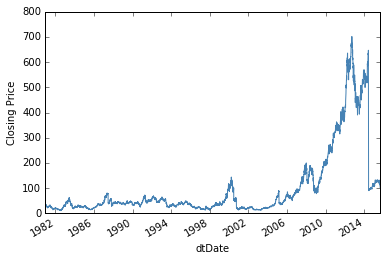

In [67]:
aapl.set_index('dtDate', inplace=True)
ax = aapl.Close.plot(color='steelblue')
ax.set_ylabel('Closing Price')

In [68]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close
dtDate,,,,,,,
2015-08-24,2015-08-24,94.870003,103.449997,92.000000,103.120003,161454200.0,103.120003
2015-08-21,2015-08-21,110.430000,111.900002,105.650002,105.760002,126289200.0,105.760002
2015-08-20,2015-08-20,114.080002,114.349998,111.629997,112.650002,67765500.0,112.650002
2015-08-19,2015-08-19,116.099998,116.519997,114.680000,115.010002,47445700.0,115.010002
2015-08-18,2015-08-18,116.430000,117.440002,116.010002,116.500000,34461400.0,116.500000


# Advanced built-in functions

Pandas also has a number of built-in functions that are a bit more advanced and useful with structured analysis. One great function is the `rolling_mean()`, which calculates a mean given a certain size window (remember when we had to write a function to do that in the [Sentiment Analyis lesson](Day5_pm2_Sentiment-Analysis.ipynb) )?

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=260,center=False).mean()
  from ipykernel import kernelapp as app


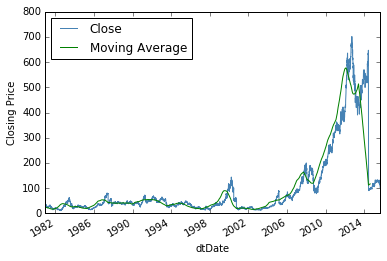

In [72]:
#There are roughly 260 workdays in a year
close_moving_avg = pd.rolling_mean(aapl.Close, 260)
#Now we just plot it
ax = aapl.Close.plot(color='steelblue')
close_moving_avg.plot(label='Moving Average', color='green')
ax.set_ylabel('Closing Price')
ax.legend(loc='best')

What if we were interested in the movement of the stock between each day (i.e. did the stock lose or gain money from one day to another)?  We can do that easily with the `diff()` function.

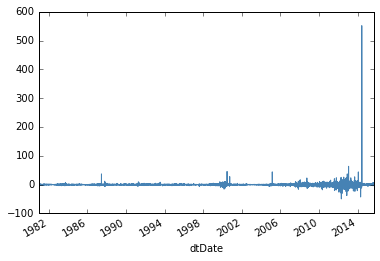

In [73]:
aapl.Close.diff().plot(color='steelblue')
ax.set_ylabel('Daily Return')

And remember at anytime we can restrict the dataset with a query and plot only that portion

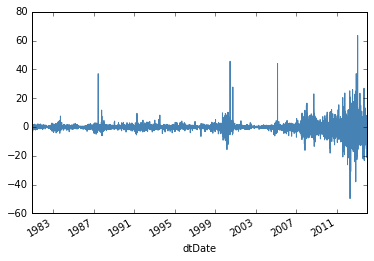

In [71]:
aapl[aapl.Date < '2014'].Close.diff().plot(color='steelblue')
ax.set_ylabel('Daily Return')

What you're seeing above is lots of function calls one on top of the other. This is called `chaining` (and isn't very pythonic), but can be very useful. We can do this with most functions, watch as we finish with the mean or standard deviation.

In [166]:
aapl[aapl.Date < '2014'].Close.diff().mean()

-0.06385964691061798

In [167]:
aapl[aapl.Date < '2014'].Close.diff().std()

3.262637419334091

In [168]:
aapl[aapl.Date < '2014'].Close.diff().median()

0.0

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


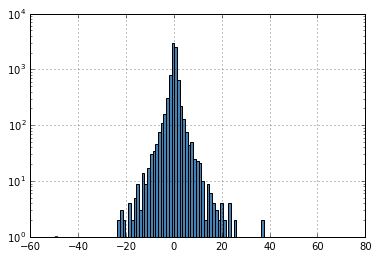

In [169]:
aapl[aapl.Date < '2014'].Close.diff().hist(bins=100, color='steelblue', log=True)

# Split-Apply-Combine

Pandas also has a codified pipline to handle faceting data, they refer to it as [Split-Apply-Combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html). In laymans terms, this means:

1. Split the data into groups
2. Compute some function or transform the data in some way
3. Combine into a new dataframe that has the groups as rows

To test this we will work with the Major data again, we will probably be interested in comparing the different major categories. How many major categories do we have?

Woops! To do a meaningfull analysis, we'll need to read in the rest of the files for the other majors.

In [75]:
ls ../Data/College-Majors/

all-ages.csv
grad-students.csv
majors-list.csv
readme.md
recent_Agriculture & Natural Resources.csv
recent_Arts.csv
recent_Arts.xlsx
recent_Arts_edited.xlsx
recent_Biology & Life Science.csv
recent_Business.csv
recent_Communications & Journalism.csv
recent_Computers & Mathematics.csv
recent_Education.csv
recent_Engineering.csv
recent_Health.csv
recent_Humanities & Liberal Arts.csv
recent_Industrial Arts & Consumer Services.csv
recent_Interdisciplinary.csv
recent_Law & Public Policy.csv
recent_Physical Sciences.csv
recent_Psychology & Social Work.csv
recent_Social Science.csv
women-stem.csv


Let's load in all of the recent_\* files

In [174]:
#Your code


But a list or dictionary of separate dataframes defeats the real utility of Pandas! We could go through the list and keeping adding all of the dataframes together, but instead we can use the built-in `concat()` function to put a list of dataframes together.

In [77]:
fulldf = pd.concat(majordfs)
fulldf.Major_category.unique()

array(['Arts', 'Agriculture & Natural Resources', 'Biology & Life Science',
       'Business', 'Communications & Journalism',
       'Computers & Mathematics', 'Education', 'Engineering', 'Health',
       'Humanities & Liberal Arts', 'Industrial Arts & Consumer Services',
       'Interdisciplinary', 'Law & Public Policy', 'Physical Sciences',
       'Psychology & Social Work', 'Social Science'], dtype=object)

In [78]:
fulldf.head()

,College_jobs,Employed,Full_time,Full_time_year_round,Low_wage_jobs,Major,Major_category,Major_code,Median,Men,...,Part_time,Percent_Employed,Rank,Sample_size,ShareWomen,Test_column,Total,Unemployed,Unemployment_rate,Women
0,693,2914,2049,1200,755,MISCELLANEOUS FINE ARTS,Arts,6099,50000,1970,...,1067,0.872455,33,30,0.410180,NaN,3340,286,0.089375,1370
1,37389,83483,67448,52243,14839,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,6004,35000,8617,...,24387,0.806755,96,1186,0.374356,NaN,103480,8947,0.096798,5156
2,7368,31433,22457,15740,5862,FILM VIDEO AND PHOTOGRAPHIC ARTS,Arts,6005,32000,22339,...,12818,0.810944,142,331,0.686993,NaN,38761,3718,0.105772,49030
3,13752,47662,29010,21425,9286,MUSIC,Arts,6002,31000,15670,...,24943,0.786074,147,419,0.444582,NaN,60633,3918,0.075960,12543
4,20792,59679,42764,31877,11880,FINE ARTS,Arts,6000,30500,24786,...,23656,0.801706,150,623,0.667034,NaN,74440,5486,0.084186,49654


One quantity that we might be interested in is the percentage of graduates who are in low wage jobs per major category. To do that, the first thing we would have to do is group all of the majors by their major category. To do that, we use the `groupby()` function.

In [79]:
grouped = fulldf.groupby('Major_category')
dir(grouped)

['College_jobs',
 'Employed',
 'Full_time',
 'Full_time_year_round',
 'Low_wage_jobs',
 'Major',
 'Major_category',
 'Major_code',
 'Median',
 'Men',
 'Non_college_jobs',
 'P25th',
 'P75th',
 'Part_time',
 'Percent_Employed',
 'Rank',
 'Sample_size',
 'ShareWomen',
 'Test_column',
 'Total',
 'Unemployed',
 'Unemployment_rate',
 'Women',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_agg_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_built

The grouped dataframe is a bit different than the regular dataframe, it's because it's storing all of the data grouped together.

There are analytical functions that we can run on the entire grouped dataframe, such as getting the variance or mean.

In [80]:
grouped.var()

,College_jobs,Employed,Full_time,Full_time_year_round,Low_wage_jobs,Major_code,Median,Men,Non_college_jobs,P25th,...,Part_time,Percent_Employed,Rank,Sample_size,ShareWomen,Test_column,Total,Unemployed,Unemployment_rate,Women
Major_category,,,,,,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,2.902410e+06,3.153780e+07,2.431060e+07,1.360777e+07,5.196119e+05,7.149167e+03,4.810000e+07,8.948944e+08,9.509773e+06,1.655778e+07,...,2.337502e+06,NaN,2036.944444,9.329822e+03,0.032665,NaN,4.688539e+07,9.964582e+04,0.000949,4.951204e+08
Arts,1.373897e+08,6.786603e+08,4.193110e+08,2.538062e+08,2.322362e+07,1.076650e+03,4.869583e+07,7.574621e+07,1.612318e+08,4.634500e+06,...,8.291923e+07,0.00077,1897.716667,1.240392e+05,0.016281,NaN,1.055918e+09,7.074373e+06,0.000111,3.720598e+08
Biology & Life Science,5.123231e+08,2.190367e+09,1.376911e+09,6.630051e+08,5.402158e+07,4.034372e+05,2.051104e+07,1.675556e+09,4.386945e+08,3.328286e+07,...,3.475637e+08,NaN,1137.478022,1.241001e+05,0.036127,NaN,5.217659e+09,1.284657e+07,0.000546,2.996474e+09
Business,1.622037e+08,8.732935e+09,7.198585e+09,4.627193e+09,1.382187e+08,6.825000e+02,6.043590e+07,5.743307e+08,2.233624e+09,5.143590e+07,...,2.911531e+08,NaN,1019.474359,1.809730e+06,0.029806,NaN,1.246703e+10,4.912316e+07,0.000252,1.675987e+08
Communications & Journalism,1.963653e+08,4.236117e+09,2.819799e+09,1.772409e+09,1.012885e+08,1.666667e+00,1.000000e+06,1.058046e+08,1.332813e+09,9.166667e+05,...,3.386351e+08,NaN,219.333333,7.244100e+05,0.058615,NaN,6.050165e+09,2.796609e+07,0.000101,3.979050e+08
Computers & Mathematics,4.438059e+08,9.904483e+08,7.629668e+08,4.511238e+08,3.359038e+06,7.332464e+05,2.609873e+07,4.064790e+07,6.299563e+07,2.766091e+07,...,4.706142e+07,NaN,585.400000,1.253660e+05,0.073476,NaN,1.559745e+09,4.027413e+06,0.001653,2.795184e+07
Education,9.079889e+08,1.779620e+09,1.215943e+09,6.304107e+08,1.302522e+07,8.867916e+04,1.515333e+07,3.875899e+08,1.163739e+08,2.605874e+07,...,1.152438e+08,NaN,752.783333,1.740335e+05,0.033865,NaN,2.446757e+09,5.231673e+06,0.000747,2.059152e+09
Engineering,1.910075e+08,3.979056e+08,3.320368e+08,1.941049e+08,1.436203e+06,2.739002e+05,1.856700e+08,4.137262e+08,2.000998e+07,1.575811e+08,...,1.535881e+07,NaN,347.458128,5.768127e+04,0.023788,NaN,6.366365e+08,2.006019e+06,0.001225,2.284234e+07
Health,1.749272e+09,2.309747e+09,1.638757e+09,1.093601e+09,3.297096e+06,3.724124e+05,3.336750e+07,6.481748e+07,3.998709e+07,3.687879e+07,...,1.109064e+08,NaN,1635.000000,4.964127e+05,0.036384,NaN,3.023422e+09,4.811651e+06,0.000503,2.678802e+09


In [81]:
grouped.mean()

,College_jobs,Employed,Full_time,Full_time_year_round,Low_wage_jobs,Major_code,Median,Men,Non_college_jobs,P25th,...,Part_time,Percent_Employed,Rank,Sample_size,ShareWomen,Test_column,Total,Unemployed,Unemployment_rate,Women
Major_category,,,,,,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,1986.000000,6694.300000,5814.300000,4362.600000,789.900000,1152.500000,36900.000000,19787.500000,3449.100000,25400.000000,...,1659.100000,NaN,101.500000,110.400000,0.617938,NaN,7998.100000,382.400000,0.056328,24981.200000
Arts,11848.125000,36014.250000,25971.625000,19138.875000,7514.500000,6015.125000,33062.500000,10847.625000,20465.000000,21962.500000,...,14348.875000,0.81567,131.125000,407.500000,0.561851,NaN,44641.250000,3528.500000,0.090173,17558.625000
Biology & Life Science,10802.357143,21628.357143,17169.785714,11843.000000,3053.000000,3475.857143,36421.428571,30557.357143,9084.428571,26614.285714,...,8338.285714,NaN,95.357143,165.500000,0.584518,NaN,32418.714286,1632.428571,0.060918,41295.142857
Business,11426.000000,83749.384615,76066.923077,60801.923077,9752.923077,6213.000000,43538.461538,13609.000000,38197.692308,33461.538462,...,15148.923077,NaN,55.846154,1192.692308,0.405063,NaN,100182.769231,6144.384615,0.071064,8489.769231
Communications & Journalism,21639.000000,82665.000000,68332.500000,53557.000000,12398.750000,1902.500000,34500.000000,9173.000000,43248.000000,26250.000000,...,22454.250000,NaN,104.000000,1127.000000,0.643835,NaN,98150.250000,6713.000000,0.075538,24569.500000
Computers & Mathematics,12532.636364,21626.727273,18867.727273,14468.727273,1466.909091,2702.727273,42745.454545,5420.272727,6769.363636,29290.909091,...,4842.727273,NaN,57.000000,260.000000,0.512752,NaN,27182.545455,1670.272727,0.084256,5690.818182
Education,21169.562500,29989.937500,24878.687500,18001.937500,2554.375000,2387.687500,32350.000000,16107.000000,7610.062500,26590.625000,...,7537.062500,NaN,130.375000,296.375000,0.674986,NaN,34945.562500,1560.562500,0.051702,38309.875000
Engineering,9302.310345,14495.586207,13167.827586,9963.862069,864.793103,2489.896552,57382.758621,13815.310345,3530.448276,41555.172414,...,2935.724138,NaN,22.620690,169.862069,0.257158,NaN,18537.344828,1028.172414,0.063334,4070.724138
Health,20453.416667,31012.250000,24568.250000,19034.833333,2605.833333,5937.916667,36825.000000,7885.833333,9208.000000,26166.666667,...,9549.333333,NaN,96.500000,326.166667,0.616857,NaN,38602.500000,1851.083333,0.065920,26002.166667


We can also use any of these functions on an individual column.

In [82]:
grouped.Men.mean()

Major_category
Agriculture & Natural Resources        19787.500000
Arts                                   10847.625000
Biology & Life Science                 30557.357143
Business                               13609.000000
Communications & Journalism             9173.000000
Computers & Mathematics                 5420.272727
Education                              16107.000000
Engineering                            13815.310345
Health                                  7885.833333
Humanities & Liberal Arts              10663.000000
Industrial Arts & Consumer Services     5006.142857
Interdisciplinary                      10031.000000
Law & Public Policy                     2096.800000
Physical Sciences                      18487.900000
Psychology & Social Work               26205.222222
Social Science                         55928.555556
Name: Men, dtype: float64

But we can't use a function on the individual columns

In [83]:
grouped.Low_wage_jobs / grouped.Employed

TypeError: unsupported operand type(s) for /: 'SeriesGroupBy' and 'SeriesGroupBy'

So any column that you want to use in the grouped analysis should be generated before you group the dataframe. Otherwise, you'll need to create the column in each group dataframe.

In [84]:
fulldf['Pct_Low_wage'] = fulldf.Low_wage_jobs/ fulldf.Employed
grouped = fulldf.groupby('Major_category')
grouped.Pct_Low_wage.mean()

Major_category
Agriculture & Natural Resources        0.096496
Arts                                   0.225222
Biology & Life Science                 0.105756
Business                               0.110870
Communications & Journalism            0.148824
Computers & Mathematics                0.074690
Education                              0.094209
Engineering                            0.064432
Health                                 0.122642
Humanities & Liberal Arts              0.175312
Industrial Arts & Consumer Services    0.128085
Interdisciplinary                      0.108034
Law & Public Policy                    0.126506
Physical Sciences                      0.118528
Psychology & Social Work               0.124714
Social Science                         0.149701
Name: Pct_Low_wage, dtype: float64

But typically we will want to know more about a grouped column of data than just the mean (or I really hope you do). Other quantities you should care about are median, standard deviation, and standard error. 

That is where the aggregate function comes in handy (this is where the `Apply` and `Combine` come into play). The `agg` function allows you to specify multiple functions at the same time and returns a single dataframe.

In [85]:
grouped.Pct_Low_wage.agg(['mean', 'median', 'std', 'sem'])

,mean,median,std,sem
Major_category,,,,
Agriculture & Natural Resources,0.096496,0.109636,0.058186,0.018400
Arts,0.225222,0.209867,0.043398,0.010849
Biology & Life Science,0.105756,0.109077,0.036520,0.009760
Business,0.110870,0.117274,0.057589,0.015972
Communications & Journalism,0.148824,0.148325,0.008826,0.004413
Computers & Mathematics,0.074690,0.061532,0.034984,0.010548
Education,0.094209,0.089866,0.055459,0.013865
Engineering,0.064432,0.067354,0.034154,0.006342
Health,0.122642,0.133141,0.046680,0.013475


And we could even combine this and plot it. 

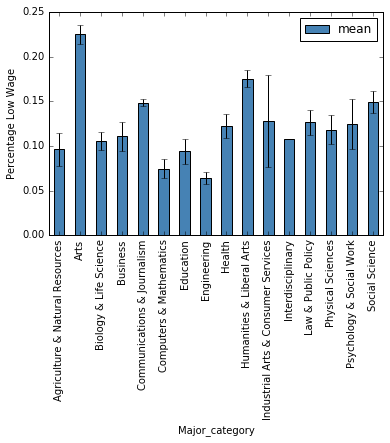

In [88]:
ax = grouped.Pct_Low_wage.agg(['mean', 'median', 'std', 'sem'])\
                         .loc[:, ['mean', 'sem']]\
                         .plot(kind='bar', yerr = 'sem', color='steelblue')
ax.set_ylabel('Percentage Low Wage')

We can also use functions that are outside of Pandas too and apply them.

In [89]:
grouped.Pct_Low_wage.agg([np.sum])

,sum
Major_category,
Agriculture & Natural Resources,0.964962
Arts,3.603554
Biology & Life Science,1.480587
Business,1.441305
Communications & Journalism,0.595298
Computers & Mathematics,0.821585
Education,1.507349
Engineering,1.868536
Health,1.471704


Or write our own functions if we give it as a dictionary and use a `lambda` function (`lambda` functions create a function in a single line.

In [90]:
import random
grouped.Pct_Low_wage.agg({'NoisyAverage': lambda x: np.mean(x*random.random())})

,NoisyAverage
Major_category,
Agriculture & Natural Resources,0.047200
Arts,0.195950
Biology & Life Science,0.096076
Business,0.006874
Communications & Journalism,0.123679
Computers & Mathematics,0.045937
Education,0.023500
Engineering,0.015572
Health,0.062881


# Getting your data out of Pandas

Sometimes you might really want to work with the data in a Pandas `dataframe` using regular Python code. At any time you can extract the data in a row, column or the entire dataframe.  We can do that simpy by appending `.values`.

When we ask for the `values` from a Pandas `dataframe` it returns our old friend, the Numpy array.

In [ ]:
df.Total.values

There, now we have an array of the actual raw values. We can iterate through these easily:

In [ ]:
for value in df.Total.values:
    print(value)

If we need to have a list instead of a Numpy array (because they aren't the same thing!) we can do that easily too.

In [ ]:
df.Total.tolist()

Had any of the manipulations we performed here actually been important, we'd of course want to save them. No more writing each item in the boring old python way, Pandas has a way to do this all in one line. All of the file formats that we could read, we can also write to. For a full list just type df.to follwed by TAB. For now, here is our excel example:

In [ ]:
df.to_excel('../Data/Day7-Structured-Data-Analysis/College-Majors/recent_Arts_edited.xlsx', sheet_name='Sheet1', index=False)

# Exercises

Read in the data file for recent graduates in business

In [ ]:
bdf = pd.read_csv('../Data/Day4-Dictionaries/College-Majors/recent_Business.csv')
bdf

Is the average unemployment rate greater for business or arts students?

In [ ]:
bus_unemployment_rate = bdf.Unemployment_rate.mean()
art_unemployment_rate = df.Unemployment_rate.mean()

What if we are only interested in the majors that have more than 20,000 students for each? Which category has the lowest unemployment rate then?

Which major category has the greater share of women students when we consider majors with >20,000 students?

Exercises completed!